https://wiki.openstreetmap.org/wiki/Map_Features

key = value
Amenity = biergarten

https://wiki.openstreetmap.org/wiki/Xapi

Query Tags

node 
http://www.informationfreeway.org/api/0.6/node[...]

Predicates
http://www.informationfreeway.org/api/0.6/node[amenity=hospital]

BBox Predicates
[bbox=-180,-90,180,90]

[bbox=left,bottom,right,top]

https://wiki.openstreetmap.org/wiki/Tag:boundary%3Dadministrative#admin_level







In [47]:
import requests
import json
overpass_url = "http://overpass-api.de/api/interpreter"

In [ ]:
overpass_query = """
[out:json];
area["ISO3166-1"="DE"][admin_level=2];
(node["amenity"="biergarten"](area);
 way["amenity"="biergarten"](area);
 rel["amenity"="biergarten"](area);
);
out center;
"""

In [48]:
overpass_query = """
[out:json];
area["ISO3166-1"="DE"][admin_level=2];
(node["amenity"="biergarten"](area);
);
out center;
"""

In [64]:
overpass_query = """
[out:json];
node["public_transport"="station"]
  (52.3122,12.9656,52.7172,13.8323); 
out;
out center;
"""

In [65]:
response = requests.get(overpass_url, 
                        params={'data': overpass_query})

In [66]:
data = response.json()

In [62]:
data

{'version': 0.6,
 'generator': 'Overpass API 0.7.55.1011 6c2efc30',
 'osm3s': {'timestamp_osm_base': '2020-01-23T13:11:03Z',
  'copyright': 'The data included in this document is from www.openstreetmap.org. The data is made available under ODbL.'},
 'elements': [{'type': 'node',
   'id': 263028186,
   'lat': 52.4288423,
   'lon': 13.7536055,
   'tags': {'amenity': 'bus_station',
    'bus': 'yes',
    'name': 'Bahnhof/Zentraler Omnibusbahnhof',
    'wheelchair': 'limited'}},
  {'type': 'node',
   'id': 553226543,
   'lat': 52.6763016,
   'lon': 13.5952618,
   'tags': {'amenity': 'bus_station',
    'name': 'Bernau, Busbahnhof',
    'wheelchair': 'limited'}},
  {'type': 'node',
   'id': 263028186,
   'lat': 52.4288423,
   'lon': 13.7536055,
   'tags': {'amenity': 'bus_station',
    'bus': 'yes',
    'name': 'Bahnhof/Zentraler Omnibusbahnhof',
    'wheelchair': 'limited'}},
  {'type': 'node',
   'id': 553226543,
   'lat': 52.6763016,
   'lon': 13.5952618,
   'tags': {'amenity': 'bus_statio

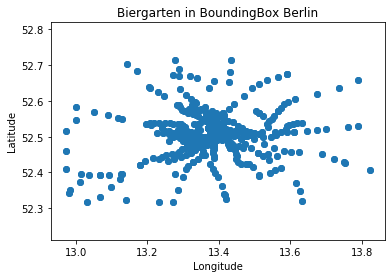

In [67]:
import numpy as np
import matplotlib.pyplot as plt
# Collect coords into list
coords = []
for element in data['elements']:
  if element['type'] == 'node':
    lon = element['lon']
    lat = element['lat']
    coords.append((lon, lat))
  elif 'center' in element:
    lon = element['center']['lon']
    lat = element['center']['lat']
    coords.append((lon, lat))
# Convert coordinates into numpy array
X = np.array(coords)
plt.plot(X[:, 0], X[:, 1], 'o')
plt.title('Biergarten in BoundingBox Berlin')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()

In [33]:
len(data['elements'])

2578